## 3 Basic Plotting 

learn to use plot() method of pandas.DataFrame 

Obtain and interpret preliminary information about a pandas.DataFrame using methods such as info() (structure), describe() (summary statistics), nunique() (unique value counts), unique() (distinct values), and value_counts() (frequency counts)

Create simple exploratory plots using the plot() method for pandas.DataFrames to visualize trends and distributions

Understand the concept of performing operations on a pandas.DataFrame in-place

Apply method chaining to enable concise and readable code

plot() method 

In [5]:
import pandas as pd

# Read in file
df = pd.read_csv('data/wetlands_seasonal_bird_diversity.csv')

# Check the first 5 rows
df.head()

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


<Axes: >

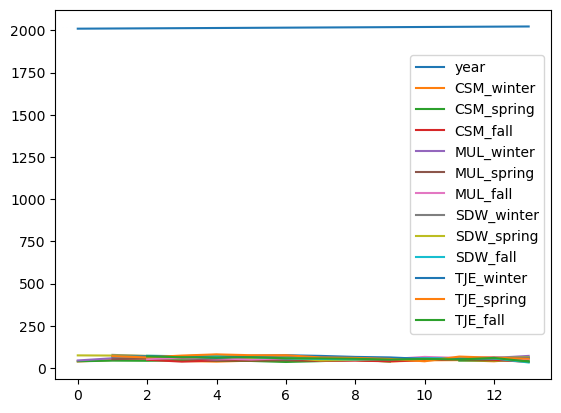

In [6]:
# Default plot() one line plot per column with numeric data 

df.plot()

## Line plots 

df.plot(x = 'x_values_column', y = 'y_values_column') 

Plot the bird surveys at Carpinteria Salt Marsh across years we can do: 

<Axes: xlabel='year'>

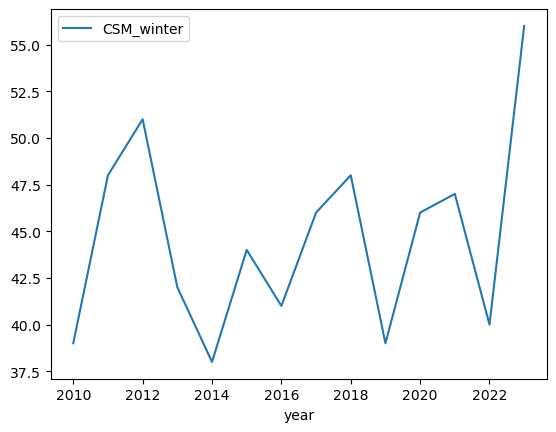

In [7]:
# Bird species registered during winter at CSM yearly 

df.plot(x = 'year', y = 'CSM_winter')

title
xlabel
ylabel
color
legend: boolean includes the legend, False removes the legend 

<Axes: title={'center': 'Bird species registered during winter at Carpinteria Salt Marsh'}, xlabel='Year', ylabel='Number of bird species'>

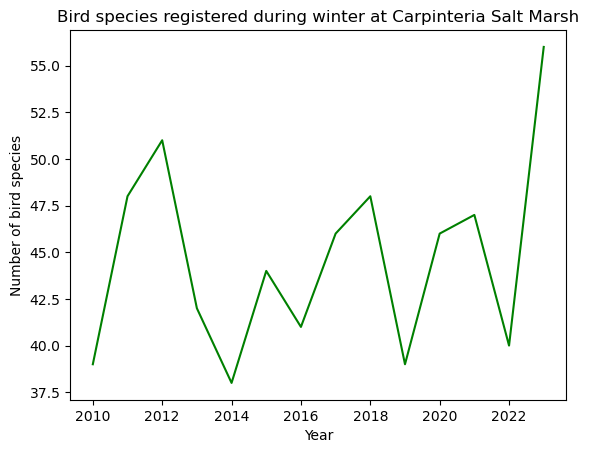

In [8]:
df.plot(x = 'year', 
        y = 'CSM_winter', 
        title = 'Bird species registered during winter at Carpinteria Salt Marsh', 
        xlabel = 'Year', 
        ylabel = 'Number of bird species', 
        color = 'green', 
        legend = False 
       )

### CHECK IN 

<Axes: title={'center': 'Bird species registered during Spring at Mugu Lagoon'}, xlabel='Year', ylabel='Number of bird species'>

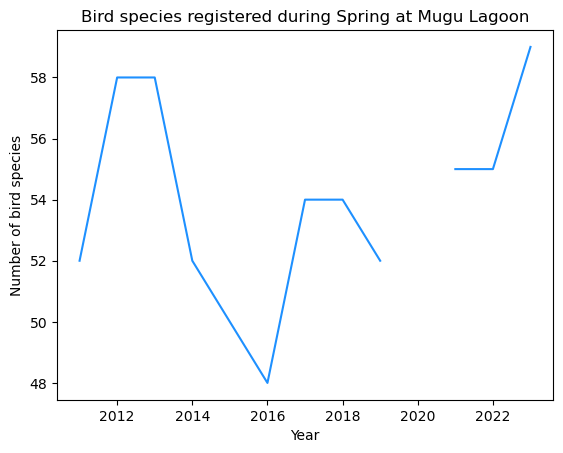

In [9]:
# 1. Plot a graph of the spring bird surveys at Mugu Lagoon with respect to years.

df.plot(x = 'year', 
        y = 'MUL_spring', 
       title = 'Bird species registered during Spring at Mugu Lagoon', 
       xlabel = 'Year', 
       ylabel = 'Number of bird species', 
       color = 'dodgerblue', 
       legend = False)


In [10]:
# 2. Use the isna() method for pandas.Series and row selection to select rows in which Mugu Lagoon has NAs during the spring survey 

df[df['MUL_spring'].isna()]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
10,2020,46.0,NaN,47.0,56.0,NaN,66.0,57.0,NaN,58.0,54.0,40.0,54.0


## Multiple line plots 

can plot multiple line plots by updating these paramters in plot()

y: a list of column names that will be plotted against the x axis 

color: a dictionary {'column_1' 'color_1', 'column_2' : 'color_2'}

Example: 

Compare the bird surveys at TJ Estuary during spring and fall across years 

<Axes: title={'center': 'Seasonal bird surveys at Tijuana Estuary'}, xlabel='Year', ylabel='Number of bird species'>

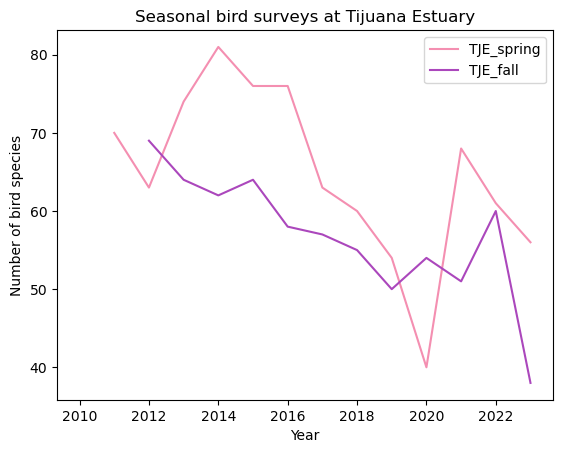

In [11]:
df.plot(x = 'year', 
        y = ['TJE_spring', 'TJE_fall'], 
        title = 'Seasonal bird surveys at Tijuana Estuary', 
        xlabel = 'Year', 
        ylabel = 'Number of bird species', 
        color = {'TJE_spring' : '#F48FB1', 
                 'TJE_fall' : '#AB47BC'
                }
       )

 We can also create separate plots for each column by subsetting the subset to True 

array([<Axes: xlabel='Year', ylabel='Number of bird species'>,
       <Axes: xlabel='Year', ylabel='Number of bird species'>],
      dtype=object)

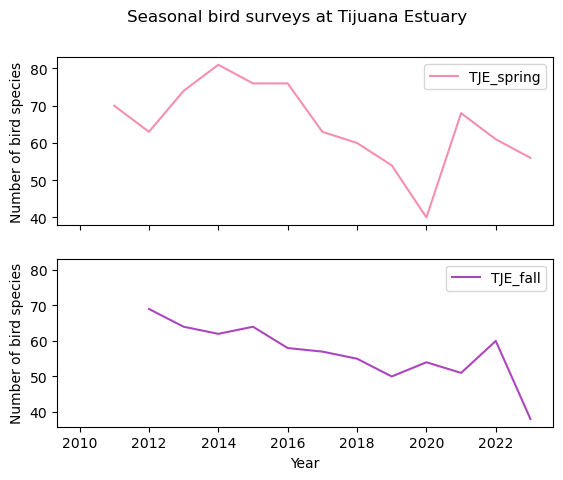

In [12]:
df.plot(x = 'year', 
        y = ['TJE_spring', 'TJE_fall'], 
        title = 'Seasonal bird surveys at Tijuana Estuary', 
        xlabel = 'Year', 
        ylabel = 'Number of bird species', 
        color = {'TJE_spring' : '#F48FB1', 
                 'TJE_fall' : '#AB47BC'
                }, 
        subplots  = True
       )

## Updating the index 

numbering the rows can be useful operation for plotting. To update the index we can use set_index() method fpr pandas.DataFrame 

df = df.set_index(new_index) 

new_index is the name of the column that we want to use as the new index 

If the new index is not a column in the datframe we want to use as an index, an array or pandas. Series of the same length as our data frame 

This operation does not happen in place. 

A function in place means that our original object is modified 

If the function does not act in place, a new object is created an original is not modified. 

To update our dataframe we could do an explicit assignment to reassign the output of set_index() to df: 

# Set 'column_name' in df as the new index (reassignment) 

df = df.set_index('column_name') 

or use the inplace method but better to use the above method 

df.set_index('column_name', inplace = True)

In [13]:
# Update the index to be the year column 

df = df.set_index('year') 
df.head()

,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
year,,,,,,,,,,,,
2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


<Axes: xlabel='year'>

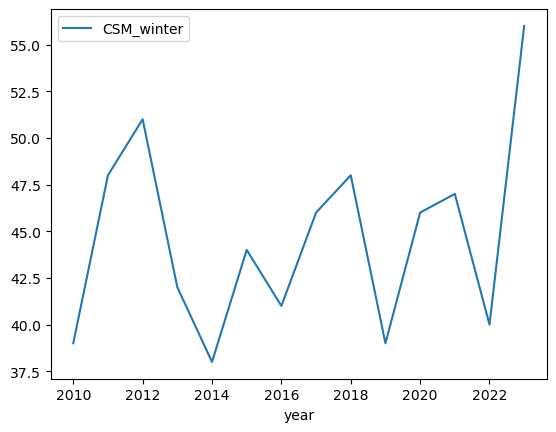

In [14]:
# Simple plot of Carpenteria Salt Marsh winter surveys 

df.plot(y = 'CSM_winter') 

In [15]:
# If needed, we can reset the index to be the numbering of the rows 

df = df.reset_index() 
df.head()

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


1. Without running the code, give a step-by-step breakdown of what this code is doing:

`df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()`

 This code is setting the year column as the index between from the SDW_winter column to the end of the dataframe, while plotting only
those columns 

2. Is this code modifying the data frame df? Why or why not?

No, this function does not act in place. A new pandas.DataFrame is created and the original is not modified 

3. Run the code and examine the graph. Review the data description. Do we have all the necessary information to make sure it makes sense to directly compare the surveys at these different sites?

There are differences in site sizes, data collection did not take place if weather was bad. 

<Axes: xlabel='year'>

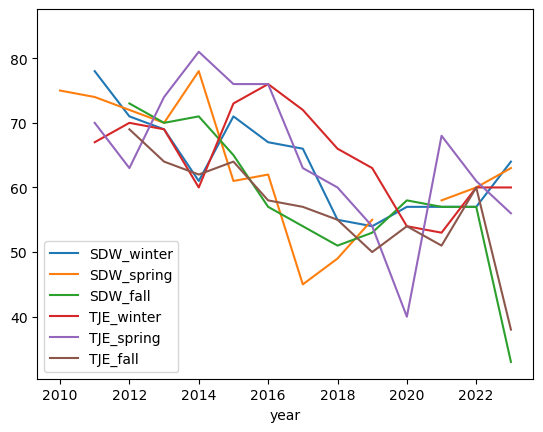

In [16]:
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()

### Method Chaining 

Example in the above code chunk is an example of method chaining. Each method in the chain returns an object, allowing the next method to be called directly on the result. 

Chaining methods results in lines of code that are hard to red. We can break up chains that are too long and hard to read. We can break up chains of methods by using parenthesis 


<Axes: xlabel='year'>

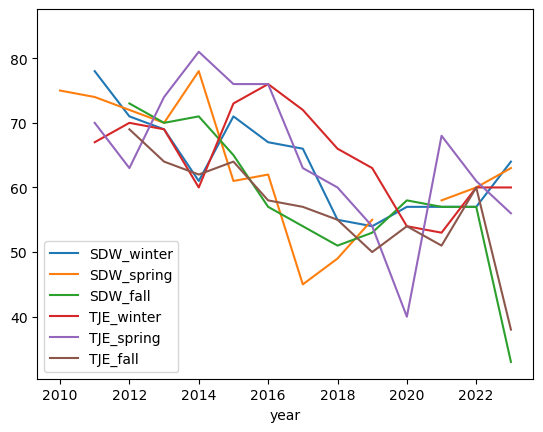

In [17]:
(df.set_index('year')
 .loc[:, 'SDW_winter' : 'TJE_fall']
 .plot()
)

`.` in method chaininng acts similar as an R pipe operator 

An alternative to the previous code chaining would have been: 

<Axes: xlabel='year'>

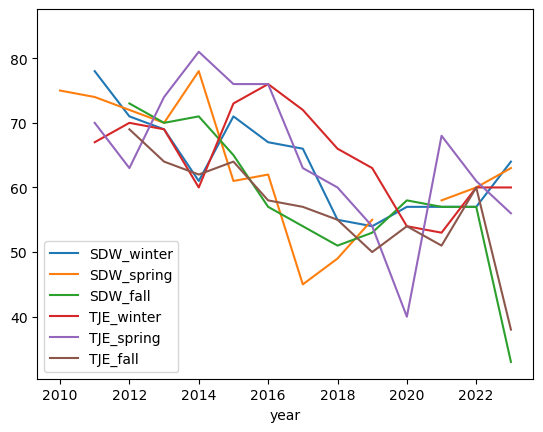

In [18]:
year_index_df = df.set_index('year')
subset_df = year_index_df.loc[:,'SDW_winter':'TJE_fall']
subset_df.plot()

Several variables are created along the way and it can be difficult to keep track of what is what 

## Data Exploration 

In [19]:
# Read in data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [20]:
# Check colum data types and NA values 

penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [21]:
# Simple statistics about numeric colums 

penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


 We can also subset the datframe to get information about a particular column or groups of columns: 

In [22]:
# Count unique values in categorical columns and year 

penguins[['species', 'island', 'sex', 'year']].nunique()

species    3
island     3
sex        2
year       3
dtype: int64

In [23]:
# Get unique values in species column 

penguins['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [24]:
# Number of values per unique value in species column 

penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

kind argument in plot () default is line 

## Scatter plots 

plot flipper length agains the body mass



<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

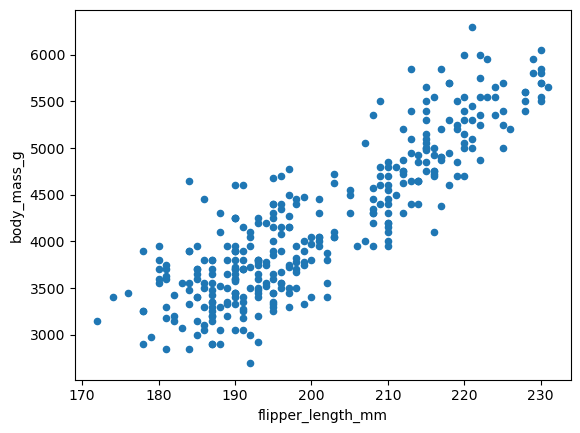

In [25]:
penguins.plot(kind = 'scatter', 
              x = 'flipper_length_mm', 
              y = 'body_mass_g')

Update other arguments to customize this graph 

<Axes: title={'center': 'Flipper length and body mass for Palmer penguins'}, xlabel='Flipper Length (mm)', ylabel='Body mass (g)'>

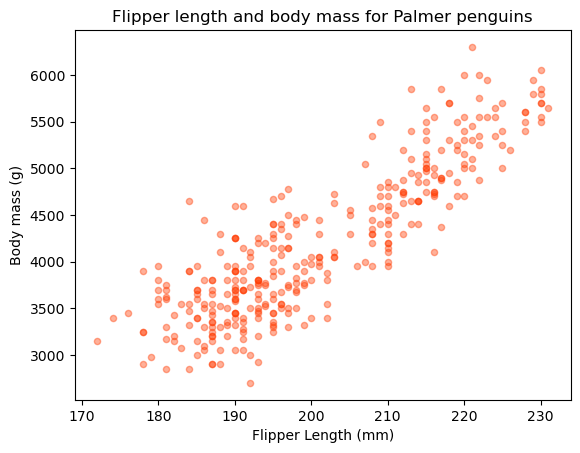

In [26]:
penguins.plot(kind = 'scatter', 
              x = 'flipper_length_mm', 
              y = 'body_mass_g', 
             title = 'Flipper length and body mass for Palmer penguins', 
             xlabel = 'Flipper Length (mm)', 
             ylabel = 'Body mass (g)', 
             color = '#ff3b01', 
             alpha = 0.4  # Control;s transparancy 
             )

## Bar plots
using kind = 'bar'
we can get data about 10 penguins with the lowest body mass.
We can select this data using nsmallest

In [27]:
smallest = penguins['body_mass_g'].nsmallest(10)
smallest

314    2700.0
58     2850.0
64     2850.0
54     2900.0
98     2900.0
116    2900.0
298    2900.0
104    2925.0
47     2975.0
44     3000.0
Name: body_mass_g, dtype: float64

And plot this data : 

<Axes: >

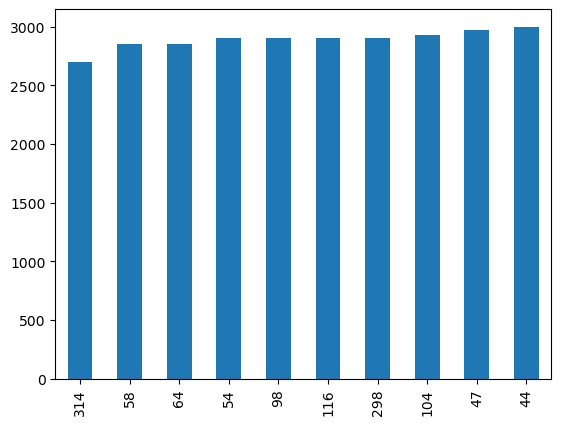

In [28]:
smallest.plot(kind = 'bar')

Can also use a different call to nsmallest 

In [29]:
penguins.nsmallest(10,'body_mass_g') 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
314,Chinstrap,Dream,46.9,16.6,192.0,2700.0,female,2008
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,female,2008
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,female,2008
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,female,2008
98,Adelie,Dream,33.1,16.1,178.0,2900.0,female,2008
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,female,2009
298,Chinstrap,Dream,43.2,16.6,187.0,2900.0,female,2007
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,female,2009
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
44,Adelie,Dream,37.0,16.9,185.0,3000.0,female,2007


## Histograms 

<Axes: ylabel='Frequency'>

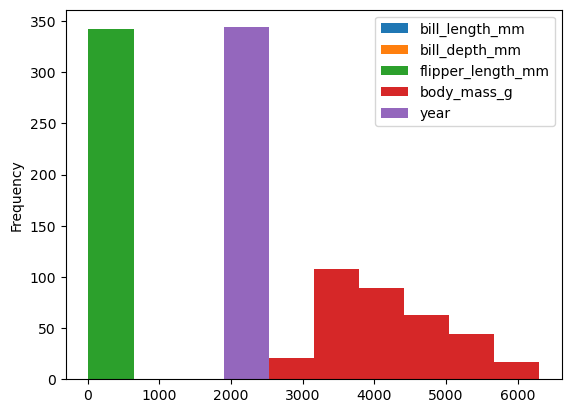

In [30]:
# Using plot without subsetting data 

penguins.plot(kind = 'hist')

Need to subset data before plotting. Distribution of flipper length: 


<Axes: title={'center': 'Penguin flipper lengths'}, xlabel='Flipper Length (mm)', ylabel='Frequency'>

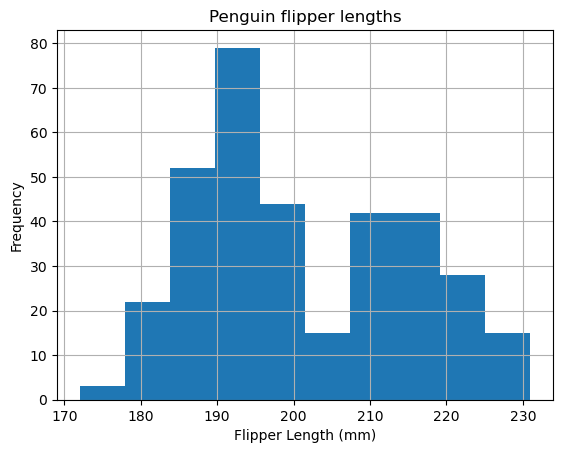

In [31]:
penguins['flipper_length_mm'].plot(kind = 'hist', 
              title = 'Penguin flipper lengths', 
              xlabel = 'Flipper Length (mm)', 
              grid = True)

### Check-in

1. Select the bill_length_mm and bill_depth_mm columns in the penguins dataframe and then update the kind parameter to box to make boxplots of the bill length and bill depth.

2. Create a simple histogram of the flipper length of female gentoo penguins.

<Axes: title={'center': 'Penguin Bill Length (mm) and Bill depth'}, xlabel='Bill Length (mm)', ylabel='Length (mm)'>

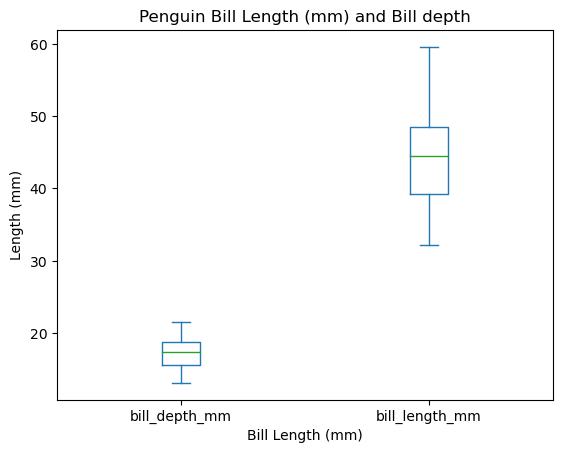

In [32]:
penguins[['bill_depth_mm', 'bill_length_mm']].plot(kind = 'box', 
                               title = 'Penguin Bill Length (mm) and Bill depth', 
                               xlabel = 'Bill Length (mm)', 
                                                   ylabel = 'Length (mm)')

In [33]:
female_gentoos = penguins[(penguins['sex'] == 'female') & (penguins['species'] == 'Gentoo')]
female_gentoos 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
152,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,female,2007
154,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,female,2007
157,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,female,2007
158,Gentoo,Biscoe,45.4,14.6,211.0,4800.0,female,2007
160,Gentoo,Biscoe,43.3,13.4,209.0,4400.0,female,2007
162,Gentoo,Biscoe,40.9,13.7,214.0,4650.0,female,2007
164,Gentoo,Biscoe,45.5,13.7,214.0,4650.0,female,2007
166,Gentoo,Biscoe,45.8,14.6,210.0,4200.0,female,2007
168,Gentoo,Biscoe,42.0,13.5,210.0,4150.0,female,2007
170,Gentoo,Biscoe,46.2,14.5,209.0,4800.0,female,2007


<Axes: title={'center': 'Flipper length (mm) of Female Gentoo Penguins'}, xlabel='Flipper length (mm)', ylabel='Frequency'>

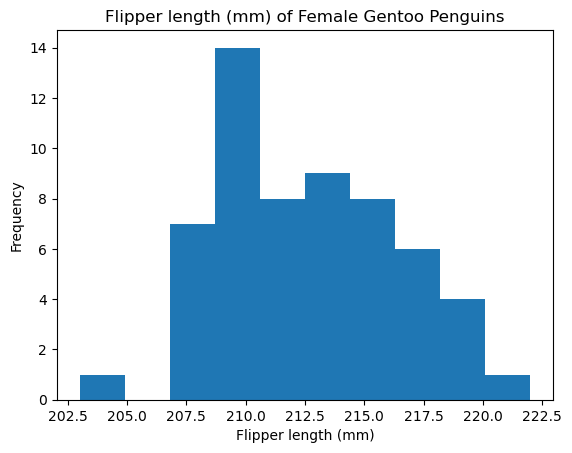

In [34]:
female_gentoos['flipper_length_mm'].plot( kind = 'hist', 
                                       title = 'Flipper length (mm) of Female Gentoo Penguins', 
                                       xlabel = 'Flipper length (mm)')

KeyError: <Axes: ylabel='Frequency'>

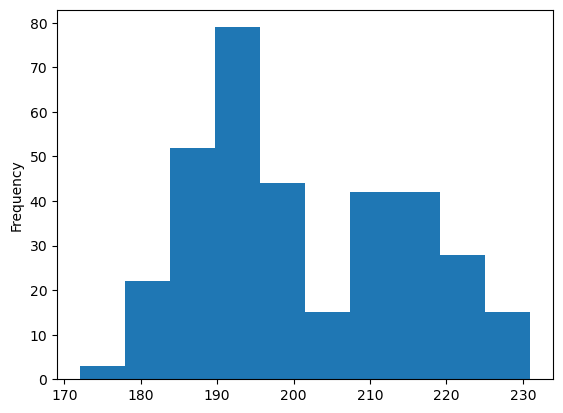

In [35]:
penguins.loc[(penguins['sex'] == 'female') & (penguins['species'] == 'Gentoo'),
             penguins['flipper_length_mm'].plot(kind = 'hist')]